# Comparison of 5 regridding algorithms

These algorithms are available:

`method_list = ['bilinear', 'conservative', 'nearest_s2d', 'nearest_d2s', 'patch']`

- Bilinear and conservative should be the most commonly used methods. They are both monotonic (i.e. will not create new maximum/minimum).
- Nearest neighbour methods, either source to destination (s2d) or destination to source (d2s), could be useful in special cases. Keep in mind that d2s is highly non-monotonic.
- Patch is ESMF’s unique method, producing highly smooth results but quite slow.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import xesmf as xe

In [2]:
ds_in = xe.util.grid_global(20, 15)  # input grid
ds_fine = xe.util.grid_global(4, 4)  # high-resolution target grid
ds_coarse = xe.util.grid_global(30, 20)  # low-resolution target grid

In [3]:
ds_in, ds_fine, ds_coarse

(<xarray.Dataset>
 Dimensions:  (x: 18, x_b: 19, y: 12, y_b: 13)
 Coordinates:
     lon      (y, x) float64 -170.0 -150.0 -130.0 -110.0 ... 130.0 150.0 170.0
     lat      (y, x) float64 -82.5 -82.5 -82.5 -82.5 ... 82.5 82.5 82.5 82.5
     lon_b    (y_b, x_b) int64 -180 -160 -140 -120 -100 ... 100 120 140 160 180
     lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
 Dimensions without coordinates: x, x_b, y, y_b
 Data variables:
     *empty*,
 <xarray.Dataset>
 Dimensions:  (x: 90, x_b: 91, y: 45, y_b: 46)
 Coordinates:
     lon      (y, x) float64 -178.0 -174.0 -170.0 -166.0 ... 170.0 174.0 178.0
     lat      (y, x) float64 -88.0 -88.0 -88.0 -88.0 ... 88.0 88.0 88.0 88.0
     lon_b    (y_b, x_b) int64 -180 -176 -172 -168 -164 ... 164 168 172 176 180
     lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
 Dimensions without coordinates: x, x_b, y, y_b
 Data variables:
     *empty*,
 <xarray.Dataset>
 Dimensions:  (x: 12, x_b: 13, y

In [4]:
ds_in['data'] = xe.data.wave_smooth(ds_in['lon'], ds_in['lat'])
ds_in

<xarray.Dataset>
Dimensions:  (x: 18, x_b: 19, y: 12, y_b: 13)
Coordinates:
    lon      (y, x) float64 -170.0 -150.0 -130.0 -110.0 ... 130.0 150.0 170.0
    lat      (y, x) float64 -82.5 -82.5 -82.5 -82.5 ... 82.5 82.5 82.5 82.5
    lon_b    (y_b, x_b) int64 -180 -160 -140 -120 -100 ... 100 120 140 160 180
    lat_b    (y_b, x_b) int64 -90 -90 -90 -90 -90 -90 -90 ... 90 90 90 90 90 90
Dimensions without coordinates: x, x_b, y, y_b
Data variables:
    data     (y, x) float64 2.016 2.009 1.997 1.987 ... 1.987 1.997 2.009 2.016

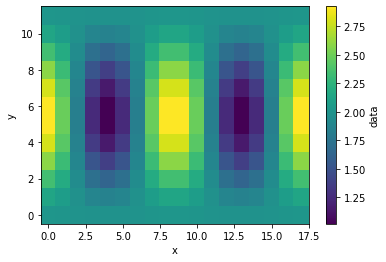

In [5]:
ds_in['data'].plot()

When dealing with global grids, we need to set periodic=True, otherwise data along the meridian line will be missing.

In [6]:
def regrid(ds_in, ds_out, dr_in, method):
    """Convenience function for one-time regridding"""
    regridder = xe.Regridder(ds_in, ds_out, method, periodic=True)
    dr_out = regridder(dr_in)
    regridder.clean_weight_file()
    return dr_out

In [8]:
method_list = ['bilinear', 'conservative', 'nearest_s2d', 'nearest_d2s', 'patch']

for method in method_list:
    %time ds_fine[method] = regrid(ds_in, ds_fine, ds_in['data'], method)
    print('')

Create weight file: bilinear_12x18_45x90_peri.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


Remove file bilinear_12x18_45x90_peri.nc
CPU times: user 120 ms, sys: 21.5 ms, total: 141 ms
Wall time: 277 ms

Create weight file: conservative_12x18_45x90.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


Remove file conservative_12x18_45x90.nc
CPU times: user 122 ms, sys: 4.91 ms, total: 127 ms
Wall time: 215 ms

Create weight file: nearest_s2d_12x18_45x90_peri.nc
Remove file nearest_s2d_12x18_45x90_peri.nc
CPU times: user 33.6 ms, sys: 2.83 ms, total: 36.5 ms
Wall time: 132 ms

Create weight file: nearest_d2s_12x18_45x90_peri.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


Remove file nearest_d2s_12x18_45x90_peri.nc
CPU times: user 13.8 ms, sys: 2.14 ms, total: 15.9 ms
Wall time: 109 ms

Create weight file: patch_12x18_45x90_peri.nc
Remove file patch_12x18_45x90_peri.nc
CPU times: user 490 ms, sys: 26.2 ms, total: 516 ms
Wall time: 725 ms



/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


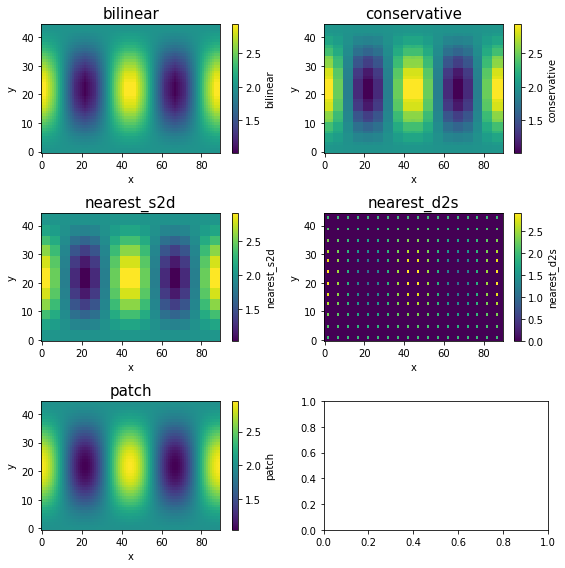

In [9]:
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_fine[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)

plt.tight_layout()

When regridding from low-resolution to high-resolution, bilinear and patch will produce smooth results, while conservative and nearest_s2d will preserve the original coarse grid structure (although the data is now defined on a finer grid.).

nearest_d2s is quite different from others: One source point can be mapped to only one destination point. Because we have far less source points (on a low-resolution grid) than destination points (on a high-resolution grid), most destination points cannot receive any data so they just have zero values. Only the destination points that are closest to source points can receive data.

# Decreasing Resolution

In [10]:
for method in method_list:
    ds_coarse[method] = regrid(ds_in, ds_coarse, ds_in['data'], method)

Create weight file: bilinear_12x18_9x12_peri.nc
Remove file bilinear_12x18_9x12_peri.nc
Create weight file: conservative_12x18_9x12.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


Remove file conservative_12x18_9x12.nc
Create weight file: nearest_s2d_12x18_9x12_peri.nc
Remove file nearest_s2d_12x18_9x12_peri.nc
Create weight file: nearest_d2s_12x18_9x12_peri.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(
/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


Remove file nearest_d2s_12x18_9x12_peri.nc
Create weight file: patch_12x18_9x12_peri.nc
Remove file patch_12x18_9x12_peri.nc


/Users/james/anaconda3/envs/bering/lib/python3.8/site-packages/xesmf/frontend.py:412: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


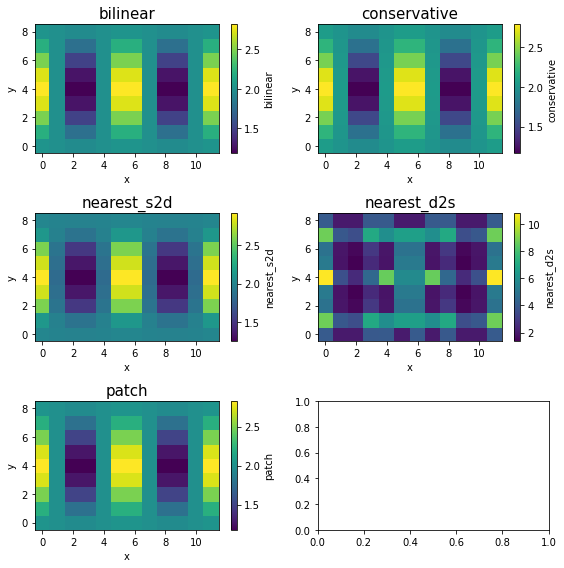

In [11]:
fig, axes = plt.subplots(3, 2, figsize=[8, 8])

for i, method in enumerate(method_list):
    ax = axes.flatten()[i]
    ds_coarse[method].plot.pcolormesh(ax=ax)
    ax.set_title(method, fontsize=15)

plt.tight_layout()

When regridding from high-resolution to low-resolution, all methods except nearest_d2s produce similar results here. But that’s largely because the input data is smooth. For real-world data, it is generally recommended to use conservative for upscaling, because it takes average over small source grid boxes, while bilinear and nearest_s2d effectively throw away most of source grid boxes.

nearest_d2s is again different: Every source point has to be mapped to a destination point. Because we have far more source points (on a high-resolution grid) than destination points (on a low-resolution grid), a single destination point will receive data from multiple source points, which can accumulate to a large value (notice the colorbar range).